<a href="https://colab.research.google.com/github/lucaschini/cripto-fraud-analysis/blob/main/Crypto_EBAC_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados em Criptomoedas: Detecção de fraudes

---



**Professora:** Profa. Dra. Isadora Garcia Ferrão

📧 isadoraferrao@usp.br

🌐 [linkedin](https://www.linkedin.com/in/isadora-ferrao/)

🔗 [Instagram](https://www.instagram.com/isadora.ferrao/)

**Descrição dos Dados:** Os dados foram coletados de fontes públicas de monitoramento de carteiras e transações na rede Ethereum, como Etherscan, Dune Analytics e outras plataformas abertas. São dados reais e anonimizados, amplamente utilizados em estudos de detecção de fraude e análise de comportamento no mercado de criptomoedas. Cada linha representa uma carteira e suas métricas de atividade.

**Objetivo:** Construir um modelo preditivo capaz de identificar, com base nas métricas de transações, quando uma carteira apresenta comportamento anômalo, caracterizando uma potencial fraude.



## **Análise exploratória**

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Configuração básica dos gráficos
plt.style.use('default')

In [ ]:
# --- 1. Carregamento e limpeza dos dados ---
df = pd.read_csv('/content/ethereum_transactions.csv')

In [ ]:
# Remover espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()
df

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189

In [ ]:
# Cria a coluna 'is_fraud' de forma direta:
# 1 se 'Sent tnx' for maior que (média + 2 * desvio padrão), senão 0
df["is_fraud"] = (df["Sent tnx"] > (df["Sent tnx"].mean() + 2 * df["Sent tnx"].std())).astype(int)
df["is_fraud"]

,is_fraud
0,0
1,0
2,0
3,0
4,1
...,...
9836,0
9837,0
9838,0
9839,0


In [ ]:
# Exibir informações iniciais para diagnóstico
# print("Colunas do Data Frame: ", df.columns.tolist()) prefiro .info()
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

## **Visualizando Correlações e Distribuições**

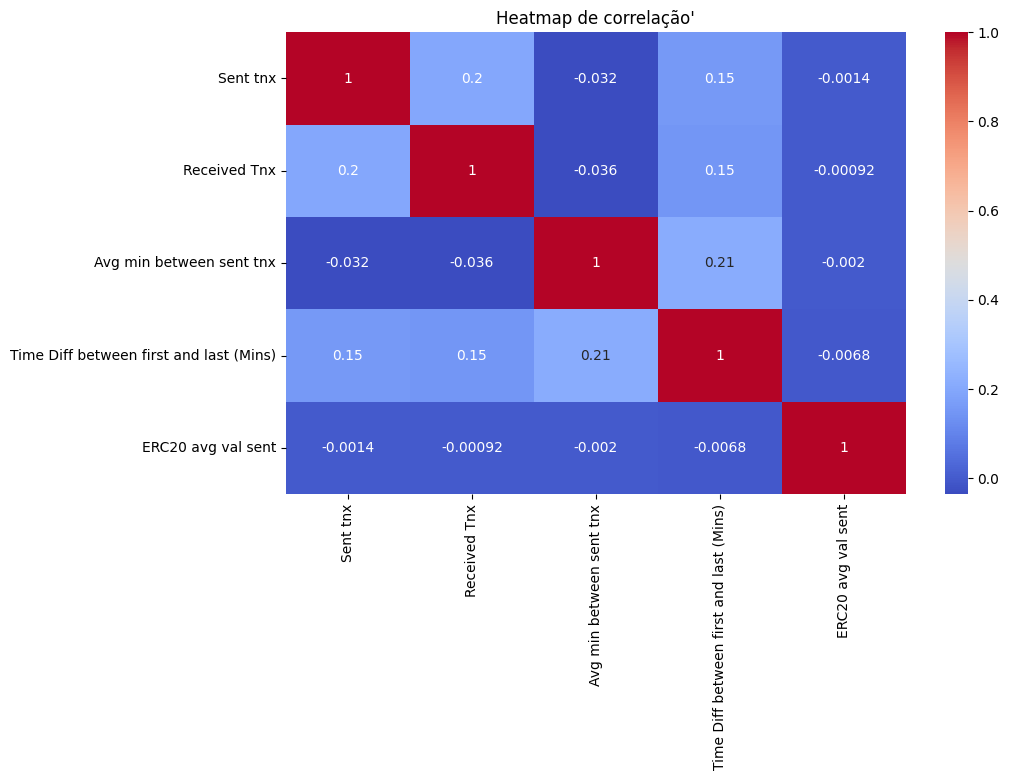

In [ ]:
# Defina as colunas relevantes para a correlação
cols_for_corr = [
    "Sent tnx",
    "Received Tnx",
    "Avg min between sent tnx",
    "Time Diff between first and last (Mins)",
    "ERC20 avg val sent"
]

corr_matrix = df[cols_for_corr].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap de correlação'")
plt.show()


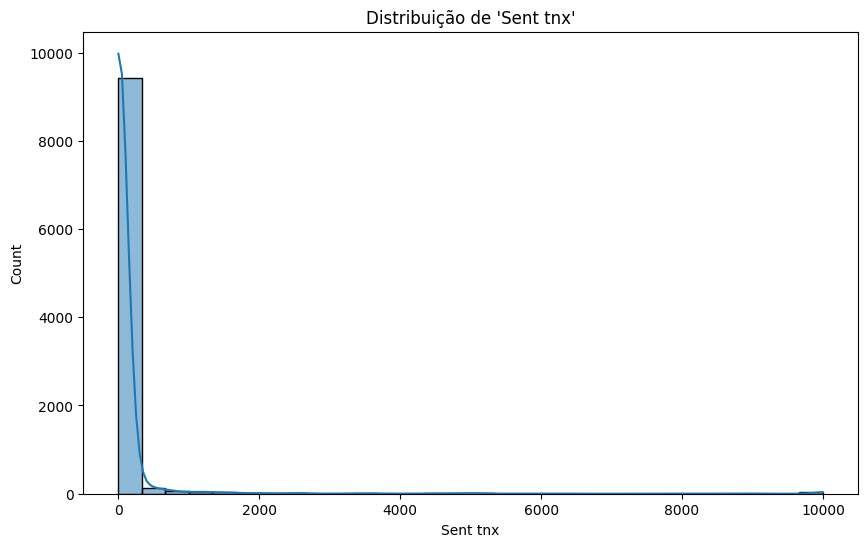

In [ ]:
# Histogramas para visualizar a distribuição de 'Sent tnx'
plt.figure(figsize=(10, 6))
sns.histplot(df["Sent tnx"], bins=30, kde=True)
plt.xlabel("Sent tnx")
plt.title("Distribuição de 'Sent tnx'")
plt.show()



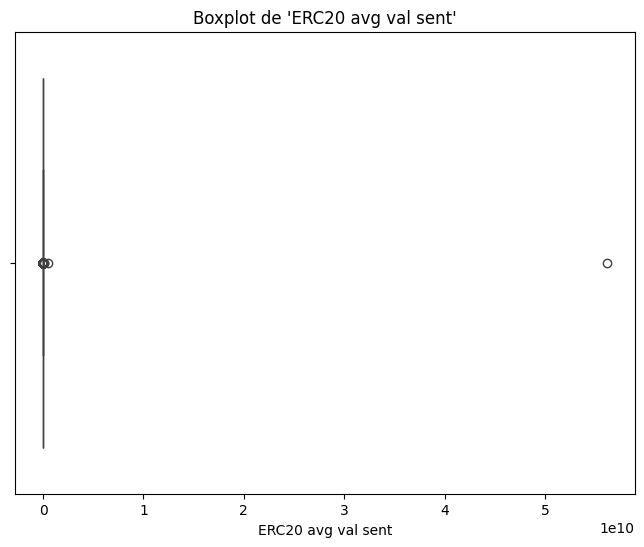

In [ ]:
# Boxplot para identificar outliers em 'ERC20 avg val sent'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["ERC20 avg val sent"])
plt.xlabel("ERC20 avg val sent")
plt.title("Boxplot de 'ERC20 avg val sent'")
plt.show()


## **BASELINE**

In [ ]:
# Calcular média e desvio padrão para 'Sent tnx'
mean_sent = df['Sent tnx'].mean()
std_sent = df['Sent tnx'].std()

threshold = mean_sent + 3 * std_sent
print(mean_sent, std_sent, threshold)

115.93171425668123 757.2263606018076 2387.610796062104


In [ ]:
# Marcar como anomalia as transações com 'Sent tnx' acima do threshold
df['baseline_anomaly'] = df['Sent tnx'].apply(lambda x: 1 if x > threshold else 0)

In [ ]:
# Exibir histograma com o threshold
plt.figure(figsize=(10,6))
sns.histplot(df["Sent tnx"], bins=30, kde=True)

plt.axv


In [ ]:
print('Número de anomalias (baseline):', df['baseline_anomaly'].sum())

Número de anomalias (baseline): 116


In [ ]:
# Método Baseline:
print(classification_report(df['is_fraud'], df['baseline_anomaly']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9697
           1       1.00      0.81      0.89       144

    accuracy                           1.00      9841
   macro avg       1.00      0.90      0.95      9841
weighted avg       1.00      1.00      1.00      9841



## **AULA 2 :)**